In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:
#Amazon data
input_file = r'amazon_cells_labelled.txt'
amazon = pd.read_csv(input_file, delimiter='\t', header=None)
amazon.columns = ['Sentence', 'Class']

#Yelp data
input_file = 'yelp_labelled.txt'
yelp = pd.read_csv(input_file, delimiter='\t', header=None)
yelp.columns = ['Sentence', 'Class']

#IMDB data
input_file = 'imdb_labelled.txt'
imdb = pd.read_csv(input_file, delimiter='\t', header=None)
imdb.columns = ['Sentence', 'Class']

                                              Sentence  Class  index
0    So there is no way for me to plug it in here i...      0      0
1                          Good case, Excellent value.      1      1
2                               Great for the jawbone.      1      2
3    Tied to charger for conversations lasting more...      0      3
4                                    The mic is great.      1      4
..                                                 ...    ...    ...
743  I just got bored watching Jessice Lange take h...      0    743
744  Unfortunately, any virtue in this film's produ...      0    744
745                   In a word, it is embarrassing.        0    745
746                               Exceptionally bad!        0    746
747  All in all its an insult to one's intelligence...      0    747

[2748 rows x 3 columns]
   Class  COUNT
0      0    846
1      1    827


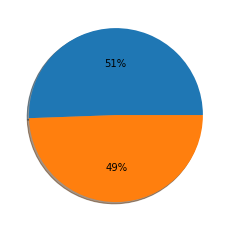

In [5]:
#combine all datasets

data = pd.DataFrame()
data = pd.concat([amazon, yelp, imdb])
data['index'] = data.index
print(data)
#*************************************************************************
#Total count of each category
pd.set_option('display.width', 4000)
pd.set_option('display.max_rows', 1000)

distOfDetails = data.groupby(by='Class', 
                             as_index=False).agg({'index':pd.Series.nunique}).sort_values(by='index', ascending=False)
distOfDetails.columns = ['Class', 'COUNT']
print(distOfDetails)

#Distribution of all categories
plt.pie(distOfDetails['COUNT'], 
        autopct='%1.0f%%', 
        shadow=True, 
        startangle=360)
plt.show() #UseQt5

In [6]:
#************************************************************************
#Text preprocessing
columns = ['index', 'Class', 'Sentence']
_df = pd.DataFrame(columns=columns)

#lower string
data['Sentence'] = data['Sentence'].str.lower()

print ('removing email address')
#remove email address
data['Sentence'] = data['Sentence'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', 
                                            '', 
                                            regex=True)

print ('removing ip address')
#remove IP address
data['Sentence'] = data['Sentence'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', 
                                            '', 
                                            regex=True)

print ('removing puncuations and special character')
#remove punctuations and special characters
data['Sentence'] = data['Sentence'].str.replace('[^\w\s]', '')

print('removing numbers')
#remove numbers
data['Sentence'] = data['Sentence'].str.replace('\d', '', regex=True)

print('removing stop words')
#remove stop words
for index, row in data.iterrows():
    word_tokens = word_tokenize(row['Sentence'])
    filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]
    _df = _df.append({'index':row['index'], 'Class': row['Class'], 'Sentence': " ".join(filtered_sentence[0:])}, ignore_index=True)

data = _df
print('data', data)

C:\Users\admin\AppData\Local\Temp\ipykernel_18804\2528672169.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Sentence'] = data['Sentence'].str.replace('[^\w\s]', '')
C:\Users\admin\AppData\Local\Temp\ipykernel_18804\2528672169.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _df = _df.append({'index':row['index'], 'Class': row['Class'], 'Sentence': " ".join(filtered_sentence[0:])}, ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_18804\2528672169.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _df = _df.append({'index':row['index'], 'Class': row['Class'], 'Sentence': " ".join(filtered_sentence[0:])}, ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_18804\2528672169.py:29: FutureWarning: The frame.append method is d

data      index Class                                           Sentence
0        0     0                    way plug us unless go converter
1        1     1                          good case excellent value
2        2     1                                      great jawbone
3        3     0  tied charger conversations lasting minutesmajo...
4        4     1                                          mic great
...    ...   ...                                                ...
2743   743     0      got bored watching jessice lange take clothes
2744   744     0  unfortunately virtue films production work los...
2745   745     0                                  word embarrassing
2746   746     0                                  exceptionally bad
2747   747     0          insult ones intelligence huge waste money

[2748 rows x 3 columns]


C:\Users\admin\AppData\Local\Temp\ipykernel_18804\2528672169.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _df = _df.append({'index':row['index'], 'Class': row['Class'], 'Sentence': " ".join(filtered_sentence[0:])}, ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_18804\2528672169.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _df = _df.append({'index':row['index'], 'Class': row['Class'], 'Sentence': " ".join(filtered_sentence[0:])}, ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_18804\2528672169.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _df = _df.append({'index':row['index'], 'Class': row['Class'], 'Sentence': " ".join(filtered_sentence[0:])}, ignore_index=True)


In [7]:
#*************************************************************************

X_train, X_test, y_train, y_test = train_test_split(data['Sentence'].values.astype('U'), 
                                                    data['Class'].values.astype('int32'), 
                                                    test_size=0.3, 
                                                    random_state=10)
classes = data['Class'].unique()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

In [8]:
#Grid search result
vectorizer = TfidfVectorizer(analyzer='word', 
                             ngram_range=(1, 2), 
                             max_features=50000, 
                             max_df=0.5, 
                             use_idf=True, 
                             norm='l2')

counts = vectorizer.fit_transform(X_train)
vocab = vectorizer.vocabulary_
classifier = SGDClassifier(alpha=1e-05, 
                           max_iter=50, 
                           penalty='elasticnet')
targets = y_train
classifier = classifier.fit(counts, targets)
example_counts = vectorizer.transform(X_test)
predictions = classifier.predict(example_counts)

In [23]:
precision_score(y_test, predictions)

0.7831325301204819

In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#Model evaluation
acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test, predictions, )
capture = recall_score(y_test, predictions,)

#hit = precision_score(y_test, predictions, average=None, labels=classes)
#capture = recall_score(y_test, predictions, average=None, labels=classes)
print('Model Accuracy: %.2f'%acc)
print(classification_report(y_test, predictions))
#********************************************************************
import itertools

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis] #Normalized CM
    
    else:
        print()

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color='white' if cm[i, j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(150, 100))


cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)
class_names = range(1, classes.size+1)



Model Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       419
           1       0.78      0.80      0.79       406

    accuracy                           0.79       825
   macro avg       0.79      0.79      0.79       825
weighted avg       0.79      0.79      0.79       825



In [26]:
#pd.DataFrame([y_test,predictions]).transpose().isna().sum()

C:\Users\admin\AppData\Local\Temp\ipykernel_18804\2505293199.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classInfo = classInfo.append([[classes[i], i+1]], ignore_index=True)


   Category  Index
0         0      1
1         1      2


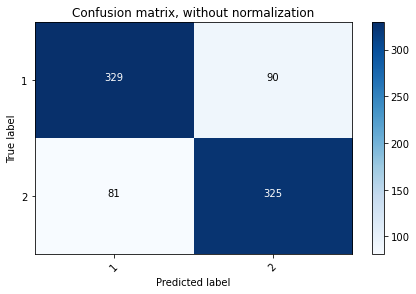

<Figure size 10800x7200 with 0 Axes>

In [27]:
#Plot for non-normlaized CM
plt.figure()

plot_confusion_matrix(cnf_matrix, 
                      classes=class_names, 
                      title='Confusion matrix, without normalization')
classInfo = pd.DataFrame(data=[])
for i in range(0, classes.size):
    classInfo = classInfo.append([[classes[i], i+1]], ignore_index=True)

classInfo.columns = ['Category', 'Index']
print(classInfo)